# Modulation layout demo

See Supplementary Information Section 1.2

Requires:
* Numpy
* Matplotlib
* SLMlayout (our custom made library to generate modulation patterns on the DMD available [here](https://github.com/wavefrontshaping/Layout)

In [1]:
import SLMlayout as Layout
import numpy as np
import matplotlib.pyplot as plt
from functions import colorize

# for Jupyter lab
# %matplotlib widget
# for Jupyter notebook
# %matplotlib notebook

%matplotlib inline

# 1. Parameters

**For the sake of vizualization, we change the values we experimentaly use.**

We actually used:
```python
param['center'] = [400,670]
param['R_ill'] = 350
param['pix_size'] = 10
param['gap'] = 0
param['order'] = 'square'
param['squareZone'] = True
param['leePeriod'] = 2
param['angle'] = 0
param['res'] = [800,1280]
```

In [6]:
param={}
param['center'] = [100,100]
param['R_ill'] = 90
param['pix_size'] = 20
param['gap'] = 0
param['order'] = 'square'
param['squareZone'] = True
param['leePeriod'] = 4
param['angle'] = 0
param['res'] = [200,200]

# probability of +1 and -1 values in the random vector
param['p1'] = 0.25 

# 2. Initialize the Layout object 

In [7]:
layout = Layout.Squares(
    param['R_ill'],
    param['pix_size'],
    param['res'],
    gap = param['gap'],
    center = param['center'],
    squareZone = param['squareZone'])

N_pix = layout.nParts

2020-10-18 18:52:41,075 - SLMlayout.layouts. [INFO   ]  Creation of hexagonal layout.
2020-10-18 18:52:41,076 - SLMlayout.layouts. [INFO   ]  Creation of the hexagons.
2020-10-18 18:52:41,077 - SLMlayout.layouts. [INFO   ]  Setting up the grid.
2020-10-18 18:52:41,082 - SLMlayout.layouts. [INFO   ]  -> Number of segments = 81
2020-10-18 18:52:41,083 - SLMlayout.layouts. [INFO   ]  Removing overlaps.
2020-10-18 18:52:41,167 - SLMlayout.layouts. [INFO   ]  -> Maximum relative variation of segment surfaces = 0.000
2020-10-18 18:52:41,167 - SLMlayout.layouts. [INFO   ]  Sorting segments.


# 3. Generate the random vector

Composed of values 0, -1 and 1

In [13]:
layout.sortSegments(order = param['order'])

# number of 0, -1, and 1 values
n1 = int(param['p1']*N_pix)
n0 = N_pix-2*n1
ordered_vec = [0]*n0+[1]*n1+[-1]*n1
vec = np.random.permutation(ordered_vec)

# 4. Create the bitplane (data to send on the DMD)

The bitplane can then be sent to the DMD via the [ALP4lib](https://github.com/wavefrontshaping/ALP4lib) module
that we developped to control [Vialux](https://www.vialux.de/en/) DMDs.

It can be installed using
`pip install ALP4lib`

In [14]:
bitplane = layout.getBitPlaneFromVec(
    vec,
    leePeriod = param['leePeriod'],
    angle = param['angle']
)

# 5. Visualize the mask to send

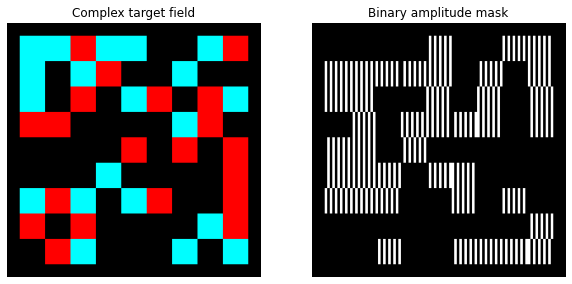

In [18]:
mask = layout.getMaskFromBitPlane(bitplane)

plt.figure(figsize = (10,6))
plt.subplot(121)
plt.axis('off')
plt.title('Complex target field')
plt.imshow(colorize(img))
plt.subplot(122)
plt.title('Binary amplitude mask')
plt.imshow(mask, cmap = 'gray')
plt.axis('off')
# plt.savefig('random_mask.svg')